## Python 常用标准库

### time 库

详细使用见文件...

#### localtime and utc time

In [1]:
import time 

# localtime and UTC time
t_localtime = time.localtime()
t_localtime

time.struct_time(tm_year=2021, tm_mon=9, tm_mday=1, tm_hour=9, tm_min=36, tm_sec=59, tm_wday=2, tm_yday=244, tm_isdst=0)

In [2]:
t_utc = time.gmtime()
t_utc

time.struct_time(tm_year=2021, tm_mon=9, tm_mday=1, tm_hour=1, tm_min=36, tm_sec=59, tm_wday=2, tm_yday=244, tm_isdst=0)

In [3]:
time.ctime()

'Wed Sep  1 09:36:59 2021'

#### 时间戳与计时器

time.time()    计入sleep

time.perf_counter()    计入sleep

time.process_time()    不计入sleep

In [4]:
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.perf_counter()
print(t_1_start)
print(t_2_start)
print(t_3_start)

1630460219.4324257
1.5324834
1.5325836


#### 格式化

time.strftime() 自定义格式化输出

In [5]:
t_localtime = time.localtime()
time.strftime("%Y-%m-%d %A %H:%M:%S ", t_localtime)

'2021-09-01 Wednesday 09:36:59 '

#### sleep

In [6]:
time.sleep(1)

### random 库

详细用法见...

#### 随机种子 - seed(a=None)

- 相同的种子会产生相同的随机数

- 如果不设置随机种子，以系统当前的时间为默认值

In [7]:
import random

random.seed(10)
print(random.random())
random.seed(10)
print(random.random())

0.5714025946899135
0.5714025946899135


In [8]:
random.random()

0.4288890546751146

#### 随机整数

In [9]:
numbers = [random.randint(0,10) for i in range(10)]    #randint(a,b) between [a,b]
numbers

[9, 0, 3, 7, 7, 4, 10, 2, 0, 8]

In [10]:
numbers = [random.randrange(10) for i in range(10)]    #randrange(a), between [0,a)]
numbers 

[7, 5, 1, 3, 5, 0, 6, 2, 9, 5]

In [11]:
numbers = [random.randrange(0,10,2) for i in range(10)] #between [a,b) in step
numbers 

[6, 6, 4, 4, 6, 2, 4, 4, 2, 6]

#### 产生随机浮点数

In [12]:
numbers = [random.random() for i in range(10)]    #between [0.0,1.0)
numbers

[0.7678378139439905,
 0.9824132490111909,
 0.9693881604049188,
 0.613326820546709,
 0.0442606328646209,
 0.004055144158407464,
 0.13397252704913387,
 0.941002271395834,
 0.3028605620290723,
 0.3661456016604264]

In [13]:
numbers = [random.uniform(2.3, 5.8) for i in range(10)]    #between [0.0, 1.0]
numbers

[5.443686855887159,
 3.400273317347577,
 4.221437644043419,
 3.826108351684428,
 2.527479616443977,
 4.345911789956755,
 5.254237641816657,
 2.847466214355922,
 3.085046390401145,
 3.7450457270019424]

#### 序列用函数

##### choice(seq)  - 从序列类型中随机返回一个元素

In [14]:
random.choice(['win', 'lose', 'draw'])

'win'

In [15]:
random.choice("python")

'p'

##### choices(seq, weights=None, k) - 对序列类型进行k次重复采样，可设置权重

In [16]:
random.choices(['win', 'lose', 'draw'], k = 5)

['lose', 'draw', 'lose', 'lose', 'draw']

In [17]:
random.choices(['win', 'lose', 'draw'],[4,4,2], k = 20)

['win',
 'lose',
 'win',
 'lose',
 'win',
 'lose',
 'win',
 'win',
 'draw',
 'draw',
 'lose',
 'lose',
 'win',
 'win',
 'lose',
 'win',
 'win',
 'lose',
 'win',
 'lose']

##### shuffle(seq) - 将序列类型中元素随机排列，返回打乱后的序列

In [18]:
numbers = ["one", "two", "three", "four"]
random.shuffle(numbers)
numbers

['three', 'four', 'one', 'two']

##### sample(pop, k) - 从pop类型中随机选取k个元素，以列表类型返回

In [19]:
random.sample([10,20,30,40,50],k=3)

[30, 50, 20]

#### 概率分布- 以高斯分布为例
gauss(mean, std)  - 产生一个符合高斯分布的随机数

In [20]:
number = random.gauss(0,1)
number

0.20666014139782196

多生成几个

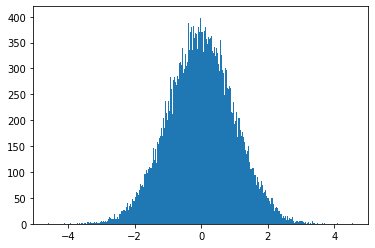

In [21]:
import matplotlib.pyplot as plt

res = [random.gauss(0,1) for i in range(100000)]

plt.hist(res, bins=1000)
plt.show()

例 用random库实现简单的微信红包随机分配

In [23]:
import random

def red_packet(total, num):
    for i in range(1, num):
        #[a,b]间均匀分布的期望是(a+b)/2， 每个人对红包的期望是total/num, 下限0.01忽略为0， 上限应为total/num *2,依此类推
        #保证每个人的期望是一样的，而不是金额是一样的
        per = random.uniform(0.01, total/(num-i+1) * 2)  
        total -= per
        print("#{} got red packet:{:.2f}.".format(i, per))
    else:
        print("#{} got red packet {:.2f}.".format(num, per))

red_packet(10.0, 5)

#1 got red packet:1.30.
#2 got red packet:2.47.
#3 got red packet:0.92.
#4 got red packet:4.03.
#5 got red packet 4.03.


统计十万次

In [28]:
import random
import numpy as np

def red_packet(total, num):
    ls = []
    for i in range(1, num):
        per = round(random.uniform(0.01, total/(num-i+1) * 2),2)
        ls.append(per)
        total -= per
    else:
        ls.append(total)
    return ls

# 重复发10万次红包，统计每个位置的平均值（近似于期望）
res = []

for i in range(100000):
    ls = red_packet(10,5)
    res.append(ls)

res = np.array(res)
print(res[:10])
np.mean(res, axis=0)

[[3.07 3.23 0.21 0.03 3.46]
 [3.5  1.22 2.4  2.36 0.52]
 [1.63 2.99 1.72 3.44 0.22]
 [2.08 0.18 1.22 1.4  5.12]
 [3.98 2.03 0.03 1.38 2.58]
 [2.21 2.47 2.51 1.23 1.58]
 [2.37 0.88 0.99 4.56 1.2 ]
 [3.06 0.87 3.57 0.44 2.06]
 [0.98 2.52 2.47 3.73 0.3 ]
 [3.21 0.78 1.37 1.22 3.42]]


array([2.0141477, 2.0057781, 1.9974376, 1.9957812, 1.9868554])

例 产生4位由数字和英文字母构成的验证码


In [36]:
import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits + string.ascii_letters
code = random.sample(s, 4)
print(code)
print(''.join(code))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['R', 'I', 'D', 'U']
RIDU


### collections库 - 容器数据类型

#### namedtuple - 具名元组

collections.namedtuple(typename, field_names, *, rename= False, defaults=None, module=None)

In [39]:
import collections

Point = collections.namedtuple("Point", ["x", "y"])
p = Point(x=2, y=11)
p 

Point(x=2, y=11)

In [41]:
# 可以看作是一个类，调用其属性
print(p.x, p.y)

2 11


In [42]:
# 有元组的性质
print(p[0])
print(p[1])
x, y = p 
print(x)
print(y)

2
11
2
11


In [43]:
# 确实是元组的字类
print(isinstance(p,tuple))

True


例· 模拟扑克牌

In [54]:
Card = collections.namedtuple("Card", ['rank', 'suit'])
ranks = [str(i) for i in range(2, 11)] + list("JQKA")
suits = "diamond heart spade club".split()
cards = [Card(rank, suit) for rank in ranks
                           for suit in suits]
#cards

In [56]:
import random

random.shuffle(cards)
#cards
hand = random.sample(cards, k=13)
hand 

[Card(rank='2', suit='heart'),
 Card(rank='Q', suit='heart'),
 Card(rank='8', suit='spade'),
 Card(rank='A', suit='diamond'),
 Card(rank='Q', suit='club'),
 Card(rank='K', suit='spade'),
 Card(rank='3', suit='diamond'),
 Card(rank='3', suit='spade'),
 Card(rank='A', suit='club'),
 Card(rank='K', suit='diamond'),
 Card(rank='10', suit='diamond'),
 Card(rank='9', suit='heart'),
 Card(rank='10', suit='spade')]

#### 计数器工具 - Counter

In [60]:

s = "刘奶奶找牛奶奶买牛奶"
colors = ['red', 'green', 'white', 'green', 'red', 'blue', 'green', 'white']
cnt_s = collections.Counter(s)
cnt_color = collections.Counter(colors)
print(cnt_s)
print(cnt_color)

Counter({'奶': 5, '牛': 2, '刘': 1, '找': 1, '买': 1})
Counter({'green': 3, 'red': 2, 'white': 2, 'blue': 1})


是一个字典的字类

In [58]:
isinstance(collections.Counter(), dict)

True

最常见的统计 - most_common()
提供n个频率最高的元素和计数

In [61]:
cnt_color.most_common(2)

[('green', 3), ('red', 2)]

元素展开 - elements()

In [62]:
list(cnt_s.elements())

['刘', '奶', '奶', '奶', '奶', '奶', '找', '牛', '牛', '买']

其他一些加减操作


In [64]:
m = collections.Counter(a=3, b=1)
n = collections.Counter(a=1, b=7)
m+n 

Counter({'a': 4, 'b': 8})

In [70]:
cards = collections.Counter(high_cards=16, low_cards=36)
seen = random.sample(list(cards.elements()), k = 10)
seen

['low_cards',
 'low_cards',
 'low_cards',
 'high_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards']

In [71]:
seen.count("high_cards")/10

0.1

#### dqueue 双向队列

列表索引非常快，但是插入和删除操作非常慢 - 通过移动元素位置来实现。

特别是insert(0, v), pop(0) 在列表的开始进行插入和删除操作，

**双向队列可以方便地在队列两边高效、快速的增加和删除元素**

In [73]:
import collections

dq = collections.deque('cde')
dq

deque(['c', 'd', 'e'])

In [74]:
dq.append("f")    # insert at the right
dq.append("g")
dq.appendleft("b")    # insert at the left
dq.appendleft("a")
dq 

deque(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [75]:
dq.pop()
dq.popleft()
dq 

deque(['b', 'c', 'd', 'e', 'f'])

### itertools 库 - 迭代器

#### 排列组合迭代器

##### product - 笛卡尔积

In [80]:
import itertools

#ls = []
for i in itertools.product("ABC","01"):
    print(i)
#ls 

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [81]:
for i in itertools.product("ABC", repeat=3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'B')
('A', 'A', 'C')
('A', 'B', 'A')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'C', 'A')
('A', 'C', 'B')
('A', 'C', 'C')
('B', 'A', 'A')
('B', 'A', 'B')
('B', 'A', 'C')
('B', 'B', 'A')
('B', 'B', 'B')
('B', 'B', 'C')
('B', 'C', 'A')
('B', 'C', 'B')
('B', 'C', 'C')
('C', 'A', 'A')
('C', 'A', 'B')
('C', 'A', 'C')
('C', 'B', 'A')
('C', 'B', 'B')
('C', 'B', 'C')
('C', 'C', 'A')
('C', 'C', 'B')
('C', 'C', 'C')


##### permutation - 排列

In [83]:
for i in itertools.permutations("ABCD", 3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [84]:
for i in itertools.permutations(range(3)):
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


##### combinations - 组合

In [85]:
for i in itertools.combinations("ABCD",2):
    print(i)

('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


In [86]:
for i in itertools.combinations(range(4), 3):
    print(i)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


##### 元素可重复组合

In [87]:
for i in itertools.combinations_with_replacement("ABCD",3):
    print(i)

('A', 'A', 'A')
('A', 'A', 'B')
('A', 'A', 'C')
('A', 'A', 'D')
('A', 'B', 'B')
('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'C')
('A', 'C', 'D')
('A', 'D', 'D')
('B', 'B', 'B')
('B', 'B', 'C')
('B', 'B', 'D')
('B', 'C', 'C')
('B', 'C', 'D')
('B', 'D', 'D')
('C', 'C', 'C')
('C', 'C', 'D')
('C', 'D', 'D')
('D', 'D', 'D')


In [88]:
for i in itertools.combinations_with_replacement(range(4),3):
    print(i)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 2)
(0, 2, 3)
(0, 3, 3)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 2)
(1, 2, 3)
(1, 3, 3)
(2, 2, 2)
(2, 2, 3)
(2, 3, 3)
(3, 3, 3)


In [89]:
for i in itertools.combinations_with_replacement("ABC",2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


In [90]:
for i in itertools.product("ABC", repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'B')
('B', 'C')
('C', 'A')
('C', 'B')
('C', 'C')


#### 拉链 - zip

##### zip - 短拉链，

In [91]:
for i in zip("ABC", "012", "xyz"):
    print(i)

('A', '0', 'x')
('B', '1', 'y')
('C', '2', 'z')


长度不一时，执行到最短的对象处，就停止

In [92]:
for i in zip("ABC","012345"):
    print(i)

('A', '0')
('B', '1')
('C', '2')


##### zip_longest 长拉链

长度不一致时，执行到最长的对象处，就停止，缺省元素用None或指定字符替代

In [97]:
for i in itertools.zip_longest("ABC", "012345"):
    print(i)

('A', '0')
('B', '1')
('C', '2')
(None, '3')
(None, '4')
(None, '5')


In [96]:
for i in itertools.zip_longest("ABC", "012345", fillvalue = "-"):
    print(i)

('A', '0')
('B', '1')
('C', '2')
('-', '3')
('-', '4')
('-', '5')


#### 无穷迭代器

##### count(start=0, step=1) - 计数

创建一个迭代器，它从start开始，返回均匀间隔的值

In [99]:
itertools.count(10, step=2)

count(10, 2)

##### cycle(iterable) - 循环

创建一个迭代器，返回iterable中所有元素，无限重复

In [100]:
itertools.cycle("ABC")

##### repeat(object, times) - 重复

创建一个迭代器，不断重复object，除非设定参数times, 否则一直重复下去

In [101]:
for i in itertools.repeat(10,3):
    print(i)

10
10
10


#### 其他

##### chain(iterables) - 锁链

把一组迭代对象串联起来，形成一个更大的迭代器


In [103]:
for i in itertools.chain("ABC", [1,3,4], ("hello", "itertools")):
    print(i)

A
B
C
1
3
4
hello
itertools


##### enumerate(iterable, start=0) - 枚举 (python内置）

产生两个元素组成的元组，结构是(index, item), 其中index从start开始，item从iterable中取。

In [106]:
for k, v in enumerate("PYthon",start=100):
    print(k, v)

100 P
101 Y
102 t
103 h
104 o
105 n


##### groupby(iterable, key=None) - 分组

创建一个迭代器，按照key指定的方式，返回iterable中连续的键和组

一般来说，要预先对数据进行排序

key为None默认把连续重复元素分组


In [110]:
for key, group in itertools.groupby("AEAAAABBBBCCDEEAAABBC"):
    print(key, list(group))

A ['A']
E ['E']
A ['A', 'A', 'A', 'A']
B ['B', 'B', 'B', 'B']
C ['C', 'C']
D ['D']
E ['E', 'E']
A ['A', 'A', 'A']
B ['B', 'B']
C ['C']


In [112]:
animals = ['duck', 'eagle', 'rat', 'giraffe', 'bear', "bat", 'dolphin', "shark", "lion"]
animals.sort(key = len)
animals

['rat', 'bat', 'duck', 'bear', 'lion', 'eagle', 'shark', 'giraffe', 'dolphin']

In [113]:
for key, group in itertools.groupby(animals, key = len):
    print(key, list(group))


3 ['rat', 'bat']
4 ['duck', 'bear', 'lion']
5 ['eagle', 'shark']
7 ['giraffe', 'dolphin']


In [114]:
animals = ['duck', 'eagle', 'rat', 'giraffe', 'bear', "bat", 'dolphin', "shark", "lion"]
animals.sort(key = lambda x: x[0])
print(animals)
for key, group in itertools.groupby(animals, key = lambda x: x[0]):
    print(key, list(group))


['bear', 'bat', 'duck', 'dolphin', 'eagle', 'giraffe', 'lion', 'rat', 'shark']
b ['bear', 'bat']
d ['duck', 'dolphin']
e ['eagle']
g ['giraffe']
l ['lion']
r ['rat']
s ['shark']
